In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [8]:
DF = pd.read_csv("FuelConsumption.csv")
DF.head(10)
DF.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


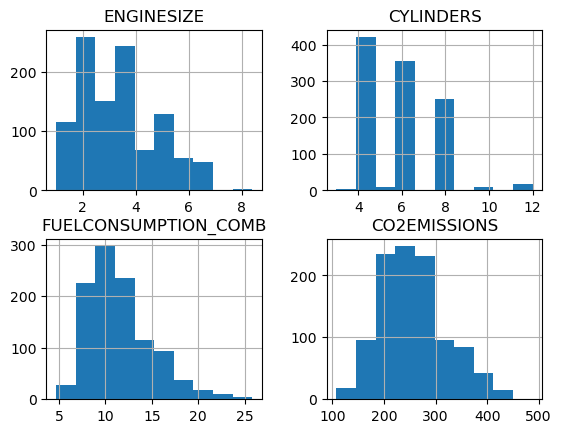

In [18]:
CDF=DF[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
CDF.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

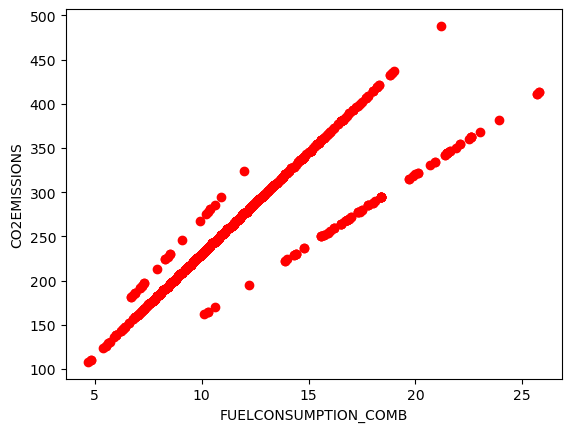

In [17]:
plt.scatter(DF.FUELCONSUMPTION_COMB,DF.CO2EMISSIONS,color="red")
plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.show


In [20]:
msk=np.random.rand(len(DF))<0.8
train = CDF[msk]
test = CDF[~msk]


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
5,3.5,6,10.0,230
21,2.0,4,9.3,214
23,2.0,4,10.0,230
...,...,...,...,...
1035,1.8,4,8.2,189
1041,2.0,4,6.9,186
1042,1.4,4,5.4,124
1052,2.0,4,11.6,267


In [24]:
from sklearn import linear_model
Model = linear_model.LinearRegression()
train_X = np.asanyarray(train[['ENGINESIZE']])
train_Y = np.asanyarray(train[['CO2EMISSIONS']])
Model.fit(train_X,train_Y)
print(Model.coef_)
print(Model.intercept_)




[[39.37149819]]
[125.09377189]


Text(0, 0.5, 'Emission')

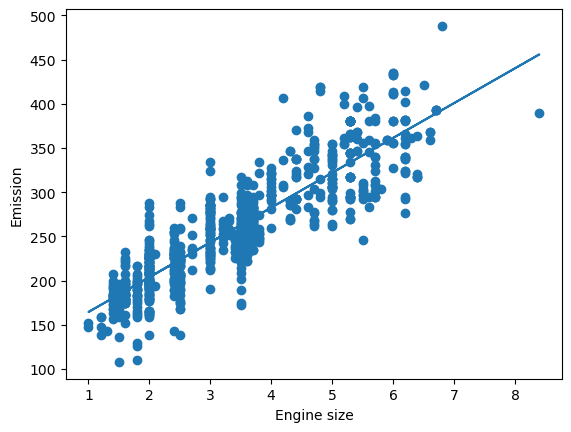

In [26]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(train_X,Model.coef_[0][0]*train_X + Model.intercept_[0])
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [27]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[['ENGINESIZE']])
test_Y = np.asanyarray(test[['CO2EMISSIONS']])
test_Y_ = Model.predict(test_X)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_Y_ - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_Y_ - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y , test_Y_) )

Mean absolute error: 25.76
Residual sum of squares (MSE): 1180.25
R2-score: 0.71
